<a href="https://colab.research.google.com/github/adudhe/Predictive-Analytics/blob/main/Auto_Arima%20For%20Shampoo%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [11]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 12.0 MB/s 
     |████████████████████████████████| 9.8 MB 47.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [15]:
#Read the sales dataset
sales_data = pd.read_csv("/content/data.csv")

In [16]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [17]:
#Make sure there are no null values at the end of the dataset
sales_data.tail()

,Month,Champagne sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [18]:
#Check the datatypes
sales_data.dtypes

Month              object
Champagne sales     int64
dtype: object

In [19]:
#Convert the month column to datetime
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [20]:
#Recheck the datatypes
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [21]:
#Set the index of the Month 
sales_data.set_index('Month',inplace=True)

In [22]:
sales_data.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


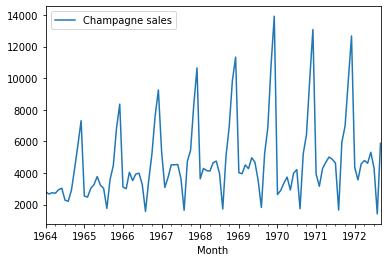

In [23]:
# To understand the pattern
sales_data.plot()

In [24]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [25]:

#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]

In [26]:
train.tail()

,Champagne sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


In [27]:
test.head()

,Champagne sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


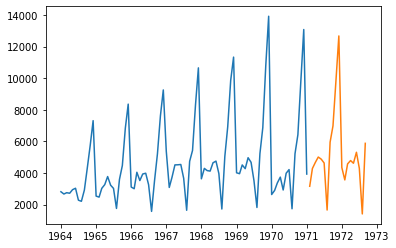

In [28]:
plt.plot(train)
plt.plot(test)

In [29]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.27 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.59 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.16 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.36 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.641, Time=1.31 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.37 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [30]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Wed, 29 Jun 2022   AIC                           1174.564
Time:                                     18:55:58   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.705536
1971-03-01,3247.915385
1971-04-01,3592.504230
1971-05-01,2800.878941
1971-06-01,3841.899504
1971-07-01,4088.022991
1971-08-01,1596.301800
1971-09-01,5090.002289
1971-10-01,6284.001523


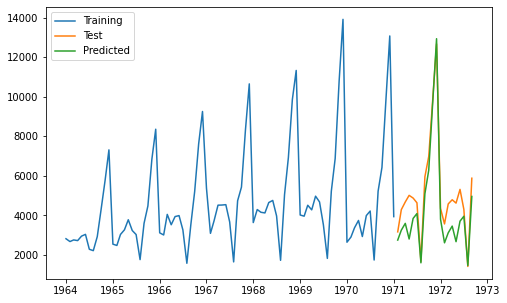

In [32]:

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [33]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114747596044508